### Setup

In [1]:
import os
import sys
import pandas as pd 

# Get the absolute path to the current wd
script_dir = os.getcwd()
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(script_dir, '..', '..', '..', '..'))
# Add the project root to the sys.path
sys.path.append(project_root)

from src.google_trends import get_related_queries, get_interest_over_time, set_URL

In [3]:
CODE_COLOMBIA = 'CO'  # ISO code for Colombia
PATH_CODES = '../../cities.csv'
KEYWORD = 'Violencia'

In [4]:
URL = set_URL(KEYWORD, CODE_COLOMBIA)

Your URL is: https://trends.google.com/trends/explore?date=2016-01-01%202023-09-01&q=Violencia&geo=CO&hl=en


In [9]:
pd.read_csv('../../cities.csv')

,lat,lng,Municipality,Municipality code,ISO
0,6.2447,-75.5748,Medellín,5001,CO-ANT
1,3.4400,-76.5197,Cali,76001,CO-VAC
2,4.5781,-74.2144,Soacha,25754,CO-CUN
3,4.1425,-73.6294,Villavicencio,50001,CO-MET
4,1.2136,-77.2811,Pasto,52001,CO-NAR
5,10.9639,-74.7964,Barranquilla,8001,CO-ATL
6,7.1186,-73.1161,Bucaramanga,68001,CO-SAN
7,4.4378,-75.2006,Ibagué,73001,CO-TOL
8,2.4411,-76.6061,Popayán,19001,CO-CAU
9,7.9075,-72.5047,Cúcuta,54001,CO-NSA


### EDA:

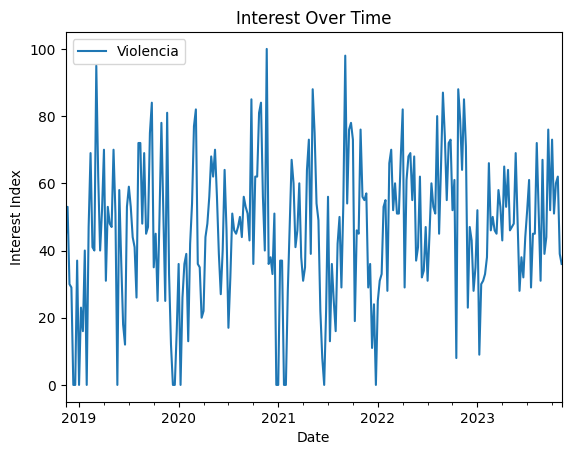


Interest Over Time Data:


,Violencia,isPartial
date,,
2018-11-18,43,False
2018-11-25,53,False
2018-12-02,30,False
2018-12-09,29,False
2018-12-16,0,False
...,...,...
2023-10-08,51,False
2023-10-15,60,False
2023-10-22,62,False


In [10]:
# Get interest over time for a location, keywords, and time range, with optional plotting
interest_over_time_data = get_interest_over_time('CO-CAU', KEYWORD, lang='en-US', plot=True)
print("\nInterest Over Time Data:")
interest_over_time_data

In [23]:
# Get related queries for a given query with location
related_queries = get_related_queries(KEYWORD, iso=CODE_COLOMBIA)
related_queries[KEYWORD]['queries']

{'top':                               query  value
 0                      la violencia    100
 1             violencia en colombia     37
 2             la violencia colombia     29
 3          la violencia en colombia     26
 4           violencia intrafamiliar     24
 5                  que es violencia     23
 6               que es la violencia     18
 7               violencia de genero     15
 8                  violencia sexual     14
 9                            genero     14
 10                     no violencia     13
 11                  la no violencia     10
 12        violencia contra la mujer     10
 13       la violencia intrafamiliar      9
 14                        conflicto      7
 15               tipos de violencia      6
 16              violencia de género      5
 17  que es la violencia en colombia      5
 18                 violencia social      4
 19                 qué es violencia      4
 20                              paz      4
 21              qué es l

### Request Data:

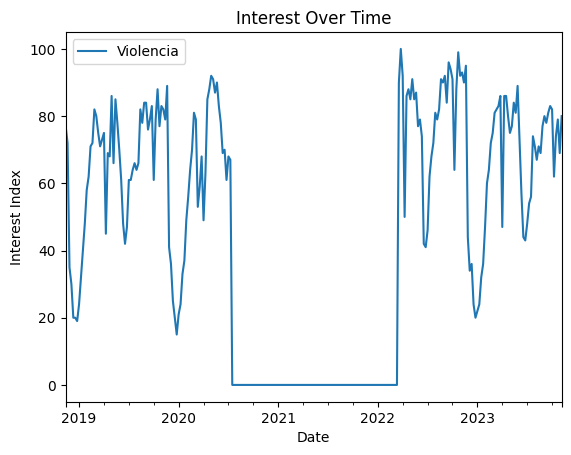


Interest Over Time Data:
            Violencia  isPartial
date                            
2018-11-18         77      False
2018-11-25         72      False
2018-12-02         35      False
2018-12-09         30      False
2018-12-16         20      False
...               ...        ...
2023-10-08         62      False
2023-10-15         74      False
2023-10-22         79      False
2023-10-29         69      False
2023-11-05         80       True

[260 rows x 2 columns]


In [6]:
# 2. Get interest over time for a location, keywords, and time range, with optional plotting
interest_over_time_data = get_interest_over_time(CODE_COLOMBIA, KEYWORD, lang='en-US', plot=True)
print("\nInterest Over Time Data:")
interest_over_time_data

In [7]:
interest_over_time_data

,Violencia,isPartial
date,,
2018-11-18,77,False
2018-11-25,72,False
2018-12-02,35,False
2018-12-09,30,False
2018-12-16,20,False
...,...,...
2023-10-08,62,False
2023-10-15,74,False
2023-10-22,79,False


In [ ]:
ISO_CODES = pd.read_csv('datasets/violence_prediction/cities.csv').ISO.tolist()
KEYWORD = 'violencia de genero'

for CODE in ISO_CODES:
    print(f'Code: {CODE}')

    df = get_interest_over_time(CODE, KEYWORD)

    os.makedirs('datasets/violence_prediction/Internet/Google/cities/', exist_ok=True)
    df.to_csv(f'datasets/violence_prediction/Internet/Google/cities/{CODE}_{KEYWORD}.csv', index=False)

If you are facing 429 error: 

Too Many Requests Error: the request failed: google returned a response with code 429:

1. visit [trends.google.com](https://trends.google.com/trends/)
2. open developer tools and go to the network tab
3. make a search, and then right-click on the top GET request (should look like explore?q=...)
4. copy the request as bash-cURL
5. paste this into [curlconverter.com](https://curlconverter.com/) and copy the cookie in the header.
6. In the .env file add the cookie like:

```{bash}
COOKIE : 'your_cookie'
```

**Note:** The solution is subject to change due to changes to the google trends API, so alternatively you can download your data using the graphical interface in [Google Trends Explore](https://trends.google.com/trends/explore)